# Capstone Project

Learning Objectives:

- Incorporate Illinois Reboot toolchain into a single nose-to-tail project.

## The Data Set

You work for a regional soft drink distribution center that has access to invoice data from convenience stores (`invoices.csv`), product data (`items.csv`), and customer reviews (the files in `reviews/`).

You would like to examine the data for a few features, then plug them into a recommendation engine to see if you can improve sales.

For instance, each data set should be validated and the fields (columns), basic data statistics, and any outliers should be reported.  Then further analysis can take place.

You may use Bash, Python (likely Pandas), SQL, and Git to complete this project.  I make some suggestions at various junctures to consider using particular tools, but feel free to solve the problem in any manner your team finds fitting.  _The entire team should read the entire project and discuss before making any decisions about platform._

You should produce a final report which responds to all of the **bolded** questions and includes full code and an explanation of its use.  You should not use a spreadsheet tool to complete any part of this project even if tempted—in particular, the `invoices.csv` file is too large to load in Microsoft Excel.

In general, feel free to reach out to me.  Follow the outline, but make this _your_ project.

### `items.csv`

The first data set you have available is a table of soft drink products with various data.  **Produce a brief report of the field names and associated column statistics for the table.**  Consider producing scatter plots of certain values, such as the bottle volume.

Each time you load a data table, you should carefully consider which fields should be numeric and which text.  For instance, a name is clearly text while a volume is numeric.  A product ID even if all numeric should be text, though.  (Can you think of why?)

In [3]:
import os
import glob
import pandas as pd


In [123]:
df = pd.read_csv("item.csv")
display(df)


,Item_id,Item_Description,Category,Pack,Bottle_Volume_ml,Bottle_Cost,Bottle_Retail_Price
0,101,Kanna's Grapefruit Soda,Grapefruit Soda,6,750.0,4.32,6.48
1,102,Alphonse's Fruit Punch,Fruit Punch,6,800.0,3.33,5.00
2,103,Yummy Surstromming Juice,NaN,1,750.0,10.30,20.10
3,107,Tamaki's Watermelon Cream,Cream Soda,6,750.0,4.44,6.66
4,108,Kaori's Grapefruit Soda,Grapefruit Soda,6,750.0,3.12,4.68
...,...,...,...,...,...,...,...
4161,994644,Saitama's Cream Soda,Cream Soda,6,750.0,12.60,18.90
4162,994786,Kenji's Vanilla Cream Soda,Cream Soda,6,750.0,4.27,6.41
4163,994972,Tanya's Vanilla Cream Soda,Cream Soda,6,750.0,5.87,8.81
4164,995606,Sakura's Cream Soda,Cream Soda,12,750.0,3.72,5.58


The invoice data set is quite large, too large in fact to be loaded by a conventional spreadsheet program.  Thus you will need to use Python or SQL to manage the data set.  You will not need to create additional fields (columns) in the table, but you will need to be able to merge data tables.

As before, **produce a report containing the field names and column statistics for the table.**

If using Python, Pandas should be able to readily handle the import.

If using SQL, you can [import the CSV file directly](https://www.sqlite.org/cli.html#importing_csv_files).

In [6]:
df1 = pd.read_csv('invoice.csv')
df1.head()
#store_id = df1[Store_id].count()
#print(store_id)

,Invoice_id,Date,Item_id,Vendor_id,Vendor_Name,Store_id,Store_Name,Address,City_Name,Zip_Code,County_id,County_Name,Bottles_Sold
0,INV-00013400001,2016-08-29,35918,297,Katou Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,1
1,INV-00013400002,2016-08-29,23828,297,Katou Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,1
2,INV-00013400003,2016-08-29,36908,300,Katsuragi Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,1
3,INV-00013400004,2016-08-29,34359,35,Archer Inc.,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,8
4,INV-00013400005,2016-08-29,36903,300,Katsuragi Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,1


The customer reviews have been stored in separate files with the format

```
Customer ID: 6880
Invoice ID: INV-01352200015
Product Rating: 2/5
```

As there are several thousand of these reviews, you should aggregate them into a single data table for ease of use.  Bash or Python should be preferred; if working in SQL then use Python and the PySQL interface to produce the SQL database.

As there are a lot of these to load, I suggest that you load only a small subset, a hundred or a thousand, first, and get things working before you load the entire data set.

**Produce a short report about the aggregated review database.**

In [3]:
import os

# # reviews = all the values from the file
valueList = []
directory = r"/Users/temporaryauricchio/Desktop/data_code/reviews" 
for filename in os.listdir(directory):
       with open(os.path.join(directory, filename), 'r') as f: 
            temp = []
            content = f.readlines()
            for value in content:
                value = value.split(" ")
                val = value[-1].strip()
            if (val[1] == "/"):
                    val = val[0]
            temp.append(val)
            valueList.append(temp)
    
reviews = pd.DataFrame(valueList, columns = ["Customer_id", "Invoice_id", "Rating"])

reviews.to_csv("/Users/temporaryauricchio/Desktop/data_code/reviews.csv")





reviews = pd.read_csv("/Users/temporaryauricchio/Desktop/data_code/reviews/reviews.csv", encoding='utf-8')
print = ("reviews")
reviews.head()




UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 78: invalid continuation byte

### Merging the Database

Once the data have been loaded into three separate tables, which I will here call `invoices`, `items`, and `reviews`, **you should merge them into each other.**  Your two master records are the invoices, which should never change in number, and the reviews, which are similarly fixed.  The item data can be combined with those.

If using Pandas, you should use a `left` join on `invoices` with `items`.

If using SQL, you should left-join `invoices` to `items`.

This should yield a merged database, `invoices_all`, which contains the invoices as records and includes information about each item sold.

Do the same for the reviews with the item data in `reviews_all`, except that you should `left` join on `reviews` with `invoices`, as not all invoice purchases generated reviews.  You should verify that you can obtain item IDs and rating numbers from the same database, as that will be necessary for the recommendation engine step below.

_(If you need help with this step, reach out to me.  That offer stands for all of this, but this step is perhaps more complicated than some others.)_

<ipython-input-274-2c3f8886f97f>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


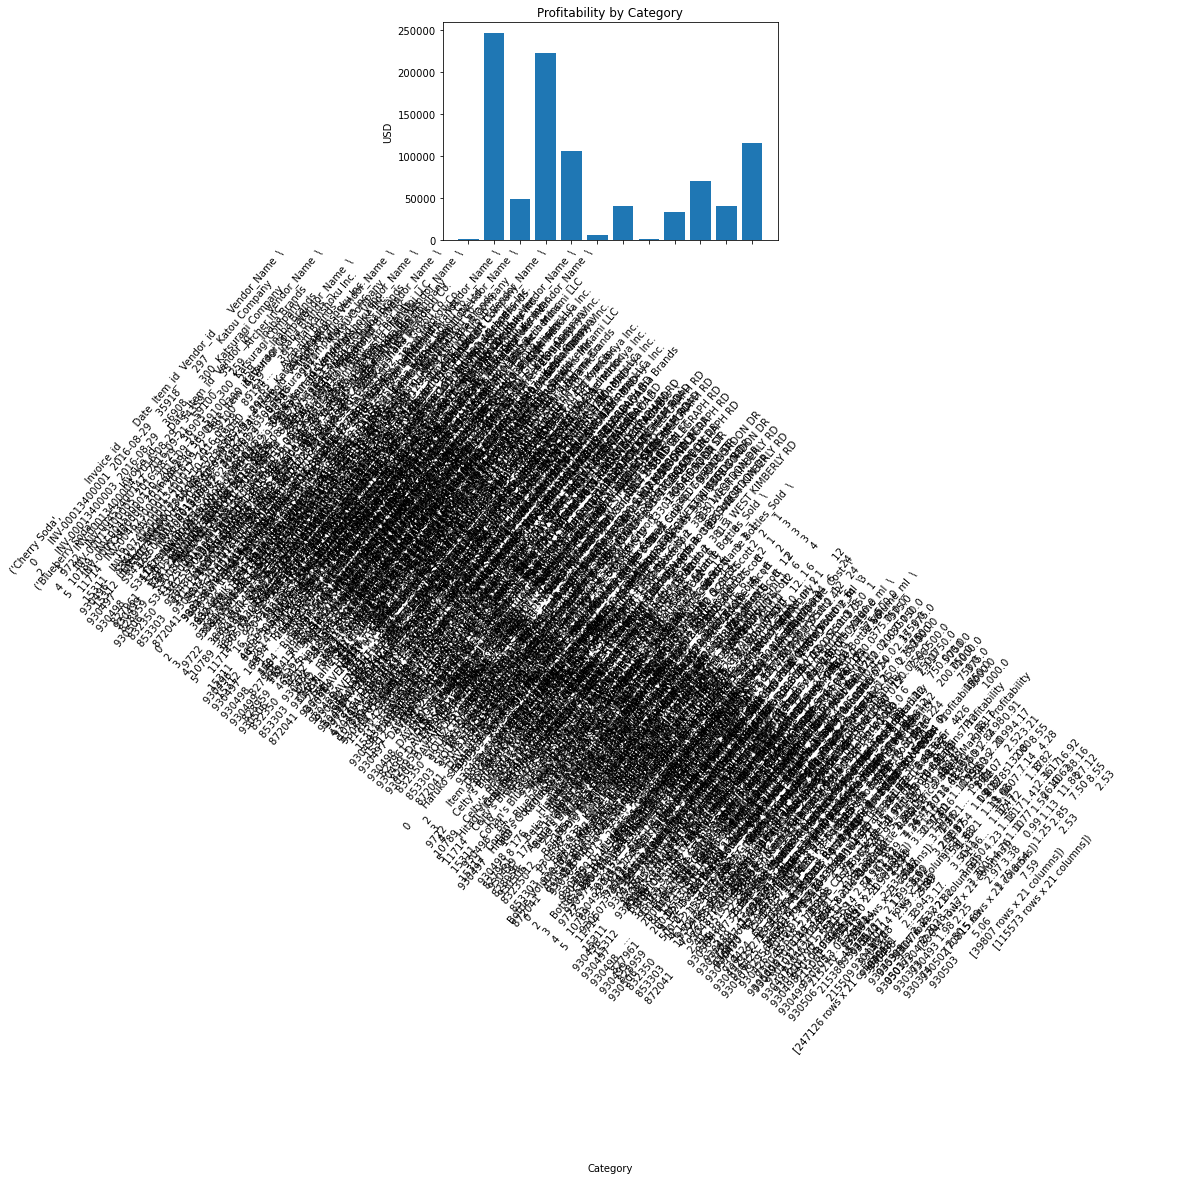

In [274]:
from matplotlib import pyplot as plt

invoices_all = pd.merge(df1,df, how='left', on='Item_id')
#invoices_all.head()
invoices_all['Bottle_Margins'] = invoices_all['Bottle_Retail_Price'] - invoices_all['Bottle_Cost']
#invoices_all.head()
#print(invoices_all.Store_id.unique())

total_profitability = lambda row: row.Bottle_Margins*row.Bottles_Sold

invoices_all['Profitability'] = invoices_all.apply(total_profitability, axis=1)

invoices_all.head()

store_name_profit = invoices_all.groupby('Category').Profitability.count()
plt.bar(range(len(invoices_all.groupby('Category'))),store_name_profit)
ax = plt.subplot()
plt.title('Profitability by Category')
plt.xlabel('Category')
plt.ylabel('USD')
ax.set_xticks(range(len(invoices_all.groupby('Category'))))
ax.set_xticklabels(invoices_all.groupby('Category'), rotation=50)
plt.show()



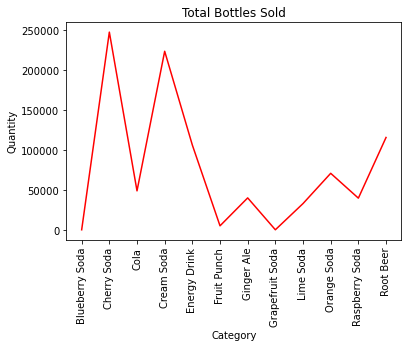

In [253]:
from matplotlib import pyplot as plt

grouping = invoices_all.groupby('Category').Bottles_Sold.count()
#print(grouping)



plt.plot(grouping, color='red')
plt.title('Total Bottles Sold')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()




## Statis

tical Analysis of the Invoices



Your manager wants you to take a look at the invoices and see if there's anything useful, salesworthy, or _fishy_ about them.  Now that you have a data table containing the invoices and item data, you are in a good situation to statistically analyze the values involved.

First off, **decide which fields should be examined statistically.**  Does it make sense to correlate against, say, bottle volume?  Number of items in a pack?  Price?  Justify your decisions.

Next, **carry out a basic statistical analysis looking for anomalies and outliers.**  These are loosely defined, but if you don't have a background in statistics, let's say that it's a value that lies at least four standard deviations from the mean, which means it should occur less than 6 in 100,000 times in a data set (0.006% likelihood).

This step is well-suited to Python, in particular the [`scipy.stats` module](https://docs.scipy.org/doc/scipy/reference/stats.html).  If your data tables are in SQL, load them into Python via the PySQL interface.

For instance, a Python-based $t$-test, looking at the likelihood of correlation, could be written as

In [229]:
df_cs = invoices_all[invoices_all['Category'] == 'Cream Soda']
df_rb = invoices_all[invoices_all['Category'] == 'Root Beer']

from scipy import stats
#stats.ttest_ind(df_cs['Rating'],df_rb['Rating'],equal_var=False)

In the result, the `pvalue` parameter is lower than $p=0.05$ if there is statistically significant correlation, greater than 0.05 otherwise.

Besides a quick look at correlations across categories, you should look at the statistical range and any outliers.  For instance, to check for outliers in items sold, we can get the standard deviation and look for records beyond our threshold:

In [230]:
avg = invoices_all['Bottles_Sold'].mean()
stdev = invoices_all['Bottles_Sold'].std()
invoices_all[invoices_all['Bottles_Sold'] > avg+4*stdev]

,Invoice_id,Date,Item_id,Vendor_id,Vendor_Name,Store_id,Store_Name,Address,City_Name,Zip_Code,...,County_Name,Bottles_Sold,Item_Description,Category,Pack,Bottle_Volume_ml,Bottle_Cost,Bottle_Retail_Price,Bottle_Margins,Profitability
3292,INV-00179900001,2016-09-07,34368,370,Kyon Inc.,2614,Hy-Vee #3 Food and Drugstore,1823 E KIMBERLY RD,DAVENPORT,52807,...,Scott,100,Ruby's Black Cherry,Cherry Soda,6,1750.0,2.91,4.37,1.46,146.00
5467,INV-00192900006,2016-09-08,11788,115,Deviluke Inc.,4196,Fareway Stores #987 / Davenport,1635 WEST 53RD ST,DAVENPORT,52806,...,Scott,100,Meliodas's Old Fashioned Cream Soda,Cream Soda,6,1750.0,2.87,4.41,1.54,154.00
15765,INV-00741300073,2016-10-05,37347,380,Le Company,2625,Hy-Vee Convenience Store #2,3301 W KIMBERLY RD,DAVENPORT,52804,...,Scott,100,Howl's Gourmet Black Cherry Soda,Cherry Soda,12,1000.0,2.10,3.15,1.05,105.00
24376,INV-01082500004,2016-10-20,11296,260,Inuyasha Brands,2635,Hy-Vee #4 / Davenport,4064 E 53RD ST,DAVENPORT,52807,...,Scott,275,Mayoi's Old Fashioned Cream Soda,Cream Soda,12,750.0,3.51,5.26,1.75,481.25
24391,INV-01082500019,2016-10-20,64868,421,Midoriya Inc.,2635,Hy-Vee #4 / Davenport,4064 E 53RD ST,DAVENPORT,52807,...,Scott,100,Sakura's Root Beer,Root Beer,6,1750.0,3.66,5.49,1.83,183.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929517,S34103000066,2016-08-24,89577,55,Arlert Company,2625,Hy-Vee Convenience Store #2,3301 W KIMBERLY RD,DAVENPORT,52804,...,Scott,120,Itachi's Cola,Cola,12,1000.0,2.49,3.74,1.25,150.00
929531,S34103000080,2016-08-24,10808,260,Inuyasha Brands,2625,Hy-Vee Convenience Store #2,3301 W KIMBERLY RD,DAVENPORT,52804,...,Scott,360,Mako's Cream Soda,Cream Soda,12,1000.0,4.11,6.17,2.06,741.60
929550,S34103000099,2016-08-24,43337,260,Inuyasha Brands,2625,Hy-Vee Convenience Store #2,3301 W KIMBERLY RD,DAVENPORT,52804,...,Scott,120,Langley's Energy,Energy Drink,12,1000.0,3.16,4.74,1.58,189.60
930191,S34113900073,2016-08-25,64870,421,Midoriya Inc.,2635,Hy-Vee #4 / Davenport,4064 E 53RD ST,DAVENPORT,52807,...,Scott,192,Saitama's Craft Root Beer,Root Beer,48,100.0,1.63,2.45,0.82,157.44


You should plot and observe if there are any clusters as well and what those may imply for the business perspective.

Similarly, you should consider the review ratings and any correlations with particular products, product categories, or other features.

**Report on your findings:  any statistically significant correlations in ratings, in sales, etc., as well as any outliers in the data which seem suspicious to you and why.**  I don't presuppose anything about what may or may not be in these data.  If no one on your team knows much about statistics, then rely more on expanding the basic analyses I've sketched above.

## A Recommendation Engine

Your business manager has suggested using the review ratings as a resource for a recommendation engine.  A recommendation engine takes a product and searches for things those who rated this product highly also liked.

A colleague of yours produced a recommendation engine using the principles outlined in the Data Analytics section of this program.  **You should prepare the data to plug into the recommendation engine, run some examples, and produce a report on the behavior and suitability.**

### `holden`

The essence of a recommendation engine is that it take a particular exemplar and produce a short list of similar suggestions.  This may be done on one of several bases:

1. Raw popularity.  Simply return similarly-rated items.  This is coarse but trivial.
2. Content similarity.  Requires extensive metadata tagging.  Combines 
3. Collaborative filtering.  Based on who rates a product highly and what else they rate highly.  (This is our approach.)

    We have customer rating data tied to invoices, and invoice data tied to soft drink data, so we are able to produce a recommendation engine which operates on the appropriate columns.

The recommendation engine `holden` is written in Python and accepts fields of data to compare.  These may be NumPy arrays, Pandas Series (columns from dataframes), or extracted from SQL via PySQL.

I have tried to make `holden` fairly robust, but it requires a few columns:  `'Customer_id'`, `'Rating'`, `'Item_id'`, and `'Item_Description'`.

In [172]:
import holden

rec = holden.holden()
rec.initialize(all_df)

ModuleNotFoundError: No module named 'holden'

In [ ]:
rec.match("Seira's Black Cherry")

Analysis in SQL for Item and Invoices tables

SELECT * FROM reboot.item;

select Category, MIN(Pack) from reboot.item
group by Category;
alter table reboot.item drop primary key;
alter table reboot.item add primary key(Item_id);
select * from reboot.invoice limit 100;

select i.Category, SUM(inv.Bottles_Sold) as Bottles_Sold from reboot.invoice inv left join reboot.item i
on i.Item_id = inv.Item_id
group by i.Category
order by i.Category ASC;



select * from reboot.invoice inv cross join reboot.item i
	on inv.Item_id = i.Item_id limit 100;
    where inv.Item_id is null;
    
with new_table as (select i.Item_Description, inv.Bottles_Sold, (Bottle_Retail_Price - Bottle_Cost) as margins from reboot.invoice inv cross join reboot.item i
	on inv.Item_id = i.Item_id) 
    select Item_Description, ROUND(SUM(Bottles_Sold * margins)) as revenue from new_table
    group by Item_Description
    order by Item_Description ASC;
    
with new_table as (select i.Category, inv.Bottles_Sold, (Bottle_Retail_Price - Bottle_Cost) as margins from reboot.invoice inv cross join reboot.item i
	on inv.Item_id = i.Item_id) 
    select Category, ROUND(SUM(Bottles_Sold * margins)) as profitability from new_table
    group by Category
    order by Category ASC;
    
    

with new_table as (select inv.Store_Name, inv.Bottles_Sold, i.Bottle_Retail_Price, (inv.Bottles_Sold * i.Bottle_Retail_Price) as Total_revenue from reboot.invoice inv left join reboot.item i
on i.Item_id = inv.Item_id) 
select Store_Name, Round(Sum(Total_revenue)) as Consolidated_sales from new_table 
group by Store_Name 
order by Store_Name ASC;


with new_table as (select inv.Vendor_Name, inv.Bottles_Sold, i.Bottle_Retail_Price, (inv.Bottles_Sold * i.Bottle_Cost) as Total_cost from reboot.invoice inv left join reboot.item i
on i.Item_id = inv.Item_id) 
select Vendor_Name, Round(Sum(Total_cost)) as Consolidated_expenses from new_table 
group by Vendor_Name 
order by Vendor_Name ASC;

